In [1]:
import tensorflow as ts
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array= cv2.imread("Dataset\\Face_Mask\\00000_Mask.jpg")

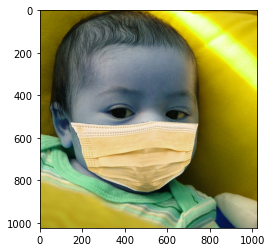

In [3]:
plt.imshow(img_array)

In [6]:
conda install pillow

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\himan\anaconda3

  added / updated specs:
    - pillow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                               4.10.1-py38haa95532_1 --> 4.10.3-py38haa95532_0




conda-4.10.3         | 2.9 MB    |            |   0% 
conda-4.10.3         | 2.9 MB    |            |   1% 
conda-4.10.3         | 2.9 MB    | 2          |   2% 
conda-4.10.3         | 2.9 MB    | 4          |   4% 
conda-4.10.3         | 2.9 MB    | 9          |   9% 
conda-4.10.3         | 2.9 MB    | #7         |  18% 
conda-4.10.3         | 2.9 MB    | ##7        |  27% 


In [4]:
import matplotlib.image as mpimg
import PIL 
from PIL import Image

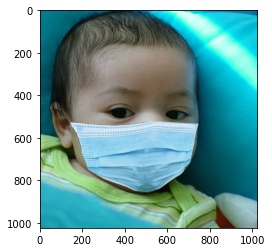

In [5]:
Datadirectory = "Dataset/"
Classes = ["Face_Mask", "No_Mask"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

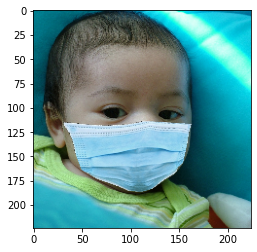

In [6]:
img_size = 224

new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
training_Data = [ ]

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array, class_num])

            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

1950


In [10]:
import random
random.shuffle(training_Data)

In [11]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(1950, 224, 224, 3)

In [13]:
X = X/255.0

In [14]:
Y = np.array(y)

In [15]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out =open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [17]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [25]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [81]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.05)

Epoch 1/2
58/58 [==============================] - 285s 3s/step - loss: 2.5026e-05 - accuracy: 1.0000 - val_loss: 6.8359e-06 - val_accuracy: 1.0000
Epoch 2/2
58/58 [==============================] - 165s 3s/step - loss: 2.8982e-06 - accuracy: 1.0000 - val_loss: 5.3235e-07 - val_accuracy: 1.0000


In [82]:
new_model.save('my_model3.h5')

In [83]:
new_model = tf.keras.models.load_model('my_model3.h5')

In [84]:
frame = cv2.imread('Dataset\\No_Mask\\00073.png')

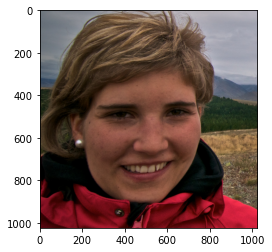

In [85]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [86]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [87]:
Predictions = new_model.predict(final_image)

In [88]:
Predictions

array([[1.]], dtype=float32)

In [34]:
frame = cv2.imread('sad_woman.jpg')

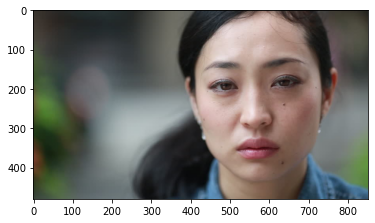

In [35]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [36]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [37]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [38]:
gray.shape

(480, 852)

In [39]:
faces = faceCascade.detectMultiScale(gray, 1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x: x+w]
    roi_color = frame[y:y+h, x: x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print ("Face not Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex + ew]

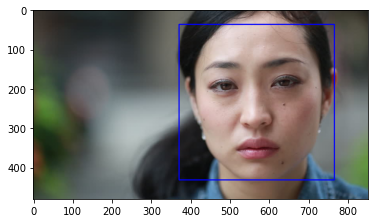

In [40]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

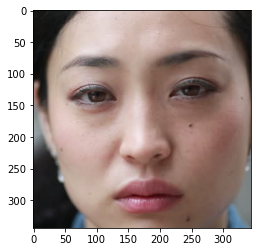

In [41]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [42]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [43]:
Predictions = new_model.predict(final_image)

In [44]:
Predictions

array([[1.]], dtype=float32)

In [45]:
frame = cv2.imread('Dataset\\No_Mask\\00074.png')

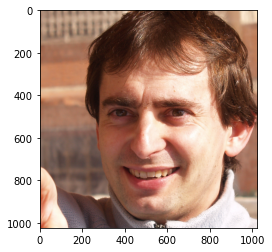

In [46]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [47]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [48]:
Predictions = new_model.predict(final_image)

In [49]:
Predictions

array([[1.]], dtype=float32)

In [50]:
frame = cv2.imread('Dataset\\Face_Mask\\00074_Mask.jpg')

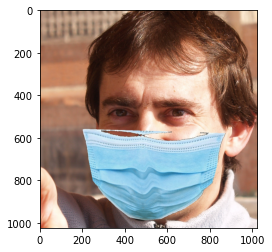

In [51]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [52]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [53]:
Predictions = new_model.predict(final_image)

In [54]:
Predictions

array([[9.273374e-09]], dtype=float32)

In [55]:
frame = cv2.imread('Dataset\\No_Mask\\00072.png')

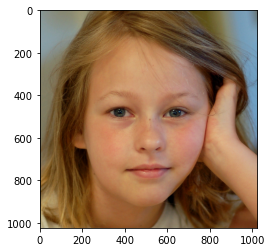

In [56]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [57]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [58]:
Predictions = new_model.predict(final_image)

In [59]:
Predictions

array([[1.]], dtype=float32)

In [90]:
import cv2
import numpy as np
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)
img = np.zeros((500,500))
text = "Testing text"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0] - 25
box_coords=((text_offset_x, text_offset_y),(text_offset_x+text_width+2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0),thickness =1)

#cap = cv2.VideoCapture('C:\\Users\\himan\\Megathon Project\\sad_woman.jpg')

#cap = cv2.imread('C:\\Users\\himan\\Megathon Project\\sad_woman.jpg')
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame=cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x: x+w]
        roi_color = frame[y:y+h, x: x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print ("Face not Detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex + ew] 
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(Predictions>0.6):
        status = "No Mask"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1),(x1+w1, y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    else:
        status = "Face Mask"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1),(x1+w1, y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,255,0),2)
        cv2.putText(frame, status,(100, 150), font, 3,(0,255,0),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y),(x+w, y+h),(0,255,0))
    cv2.imshow('MaskDetect', frame)
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
    
#cv2.waitKey()


cap.release()
cv2.destroyAllWindows()

Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
Face not Detected
